# UNEMPLOYMENT ANALYSIS

### Load Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
#from sklearn.preprocessing import train_test_split


### Loading data

In [2]:
# Specifying the data path
# Specify you own path when running it(where you save you save your file)
Data_path1 = "C:\\Users\\patiphiri\\Desktop\\Oasis datascience\\Task_2_Unemployment\\Unemployment\\Unemployment in India.csv"
Data_path2 = "C:\\Users\\patiphiri\\Desktop\\Oasis datascience\\Task_2_Unemployment\\Unemployment\\Unemployment_Rate_upto_11_2020.csv"

In [3]:
# Reading the file
df1 = pd.read_csv(Data_path1)
df2 = pd.read_csv(Data_path2)


In [4]:
print(df1.shape)
df2.shape

(768, 7)


(267, 9)

In [5]:
df1.columns


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
df2.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [7]:
# Columns have leading spaces before the names
#Lets remove them so they dont cause problems when accessing the column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()



In [8]:
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [9]:
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [10]:
# Check unique values in the 'Frequency' column
print(df2['Frequency'].unique())


[' M']


In [11]:
# We can also see that the Frequency column in df2 is represented by "M" 
# So we are going to change the values to "Monthly"

df2['Frequency'] = df2['Frequency'].replace(' M', 'Monthly')
df2.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,Monthly,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,Monthly,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,Monthly,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,Monthly,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,Monthly,17.43,12988845,36.46,South,15.9129,79.74


In [12]:
# We can see that the two dataframes have some columns which are common are soem which are not
# We wont be able to use those ones so we are going to drop them 
# Starting with the first dataframe we are going to drop "Area" column

Unwanted_cols = "Area"

df1 = df1.drop(Unwanted_cols,axis =1)

In [13]:
# For dataframe 2 we are going to drop the "Region.1", "longitude" and "latitude" columns

# Create a list of columns we want to drop
Unwanted_cols = ["Region.1","longitude","latitude"]

#Use drop function to remove the columns
df2 = df2.drop(Unwanted_cols,axis =1)

In [14]:
# We acn also see frequency column in df2 is represented by a letter only
# Lets try to make it the same as df1
df2.columns


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)'],
      dtype='object')

In [17]:
# Lets also change the Date column to data data type and then arrange the entries in order if they are not in order

# Converting 'Date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)

# Sort DataFrame by date
df1 = df1.sort_values(by='Date')
df2 = df2.sort_values(by='Date')

# Reset index if needed
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

# Checking for missing values or null values

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    object        
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 30.1+ KB


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 10.5+ KB


In [28]:
# Checking for total null values in each column in the dataframes

df1.isnull().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
dtype: int64

In [29]:
# Now for df2
df2.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
dtype: int64

In [30]:
df1.tail(28)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
740,NaN,NaT,NaN,NaN,NaN,NaN
741,NaN,NaT,NaN,NaN,NaN,NaN
742,NaN,NaT,NaN,NaN,NaN,NaN
743,NaN,NaT,NaN,NaN,NaN,NaN
744,NaN,NaT,NaN,NaN,NaN,NaN
745,NaN,NaT,NaN,NaN,NaN,NaN
746,NaN,NaT,NaN,NaN,NaN,NaN
747,NaN,NaT,NaN,NaN,NaN,NaN
748,NaN,NaT,NaN,NaN,NaN,NaN
749,NaN,NaT,NaN,NaN,NaN,NaN


### Drop rows with missing data or null values

In [31]:
# Lets remove the rows with missing or null values


# Find missing values in rows
rows_with_missing = df1[df1.isnull().any(axis=1)]

if not rows_with_missing.empty:
    print("Rows with missing values found:")
    print(rows_with_missing)
else:
    print("No rows with missing values.")

Rows with missing values found:
    Region Date Frequency  Estimated Unemployment Rate (%)  \
740    NaN  NaT       NaN                              NaN   
741    NaN  NaT       NaN                              NaN   
742    NaN  NaT       NaN                              NaN   
743    NaN  NaT       NaN                              NaN   
744    NaN  NaT       NaN                              NaN   
745    NaN  NaT       NaN                              NaN   
746    NaN  NaT       NaN                              NaN   
747    NaN  NaT       NaN                              NaN   
748    NaN  NaT       NaN                              NaN   
749    NaN  NaT       NaN                              NaN   
750    NaN  NaT       NaN                              NaN   
751    NaN  NaT       NaN                              NaN   
752    NaN  NaT       NaN                              NaN   
753    NaN  NaT       NaN                              NaN   
754    NaN  NaT       NaN             

In [32]:
# Drop rows in the dataframe 1
# if missing column checker returned columns with missing values then we drop the columns

df1.drop(rows_with_missing.index, inplace = True)

In [33]:
df1.shape

(740, 6)

In [34]:
df1.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
dtype: int64

In [35]:
# Combining the df1 and df2
merged_df  = pd.concat([df1,df2])

In [36]:
# Lets check if they were merged correctly by checking the shape
merged_df.shape

(1007, 6)

In [37]:
merged_df.to_csv("C:\\Users\\patiphiri\\Desktop\\Oasis datascience\\Task_2_Unemployment\\Unemployment\\Merged_Unemployment.csv",index = False)
merged_df.to_excel("C:\\Users\\patiphiri\\Desktop\\Oasis datascience\\Task_2_Unemployment\\Unemployment\\Merged_Unemployment.xlsx",index = False)

## Lets do some visulaizations using python

In [38]:
# You can load the new using the new merged csv
# But will continue using merged_df since its the same
# Going to use matplotlib and seaborn libraries

In [64]:
merged_df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,2019
1,Maharashtra,2019-05-31,Monthly,6.08,16962574.0,38.30,2019
2,Jharkhand,2019-05-31,Monthly,17.23,2404033.0,43.25,2019
3,Jammu & Kashmir,2019-05-31,Monthly,23.04,1130139.0,46.74,2019
4,Himachal Pradesh,2019-05-31,Monthly,10.88,245668.0,45.27,2019


In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 266
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   1007 non-null   object        
 1   Date                                     1007 non-null   datetime64[ns]
 2   Frequency                                1007 non-null   object        
 3   Estimated Unemployment Rate (%)          1007 non-null   float64       
 4   Estimated Employed                       1007 non-null   float64       
 5   Estimated Labour Participation Rate (%)  1007 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 47.2+ KB


## 1. How do the unemployment rates compare over the years in India

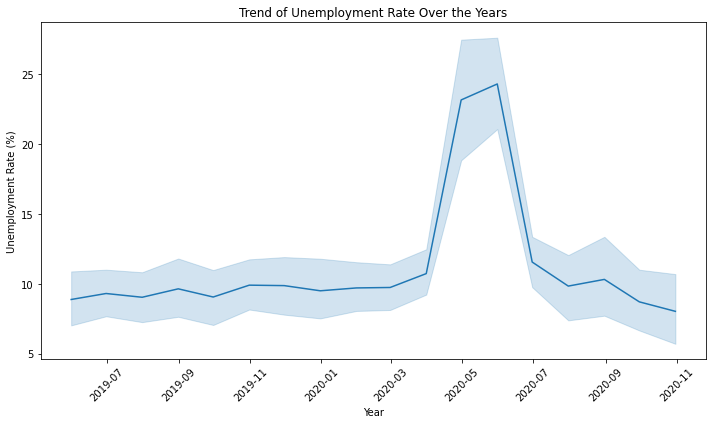

In [52]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Estimated Unemployment Rate (%)', data=merged_df)
plt.title('Trend of Unemployment Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2. Regional Disparities in Unemployment Rates

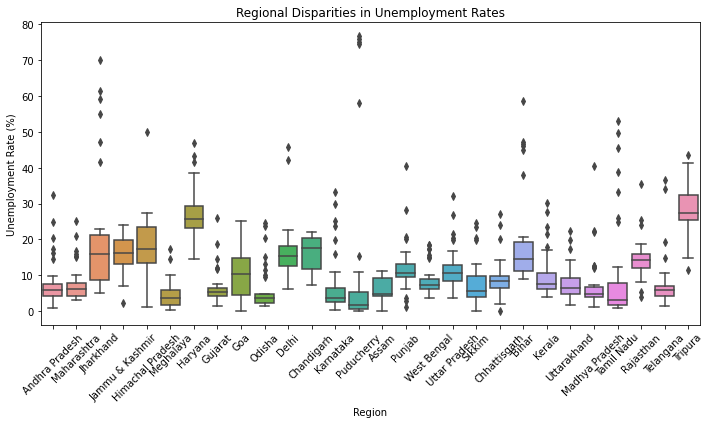

In [53]:
# Using a box plot to see the disparities
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=merged_df)
plt.title('Regional Disparities in Unemployment Rates')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

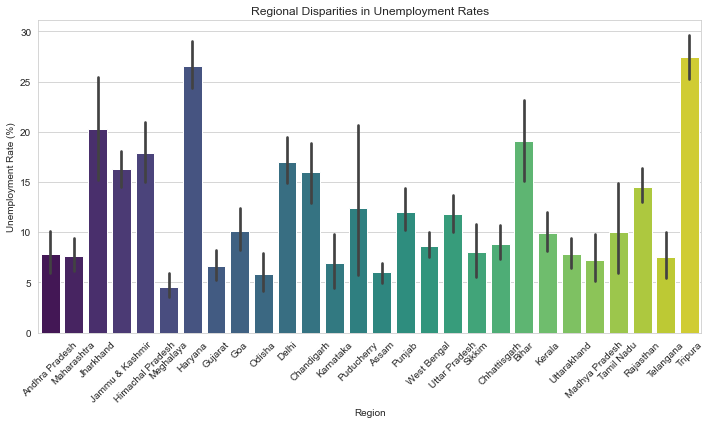

In [63]:
# Now using a bar plot to see the disparities
#import seaborn as sns
#import matplotlib.pyplot as plt

# Create a bar plot to compare unemployment rates across regions
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=merged_df, palette='viridis')
plt.title('Regional Disparities in Unemployment Rates')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3.  Compare the participation rate vs the Estimated Employed

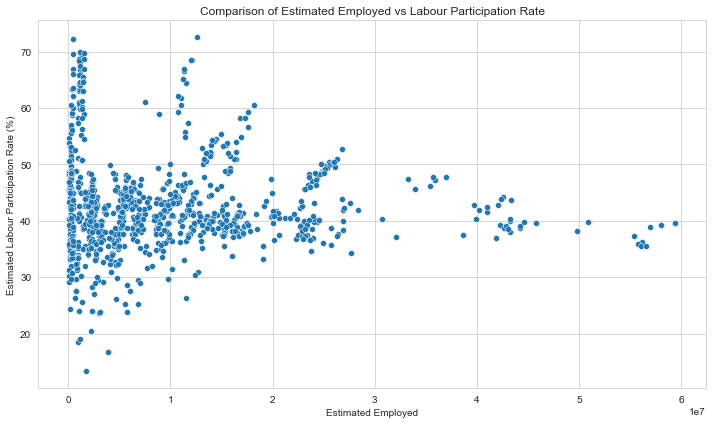

In [59]:

from matplotlib.ticker import ScalarFormatter

# Create a scatter plot to compare Estimated Employed vs Estimated Labour Participation Rate
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='Estimated Employed', y='Estimated Labour Participation Rate (%)', data=merged_df)
plt.title('Comparison of Estimated Employed vs Labour Participation Rate')
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Labour Participation Rate (%)')

# Format x-axis ticks to regular numeric format
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=False))

plt.tight_layout()
plt.show()



##  4. What is the relationship or correlation between 'Estimated Unemployment Rate (%)',  'Estimated Employed', 'Estimated Labour Participation Rate (%)'

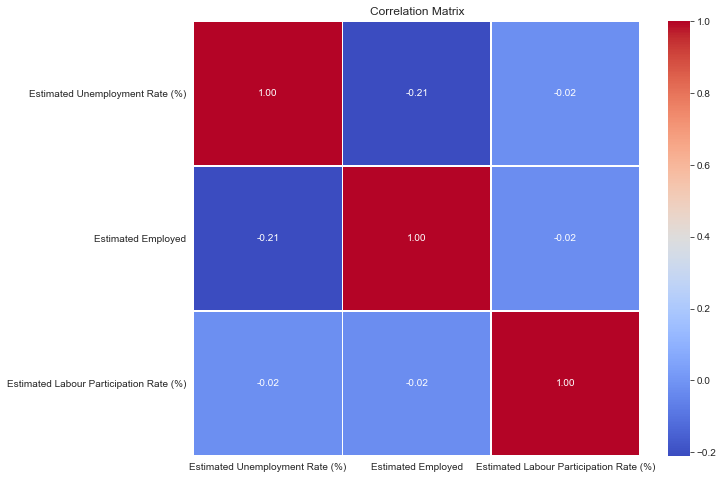

In [62]:


# Specify columns to include in the correlation matrix
columns_to_correlate = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']

# Select only the specified columns from your DataFrame
selected_df = merged_df[columns_to_correlate]

# Generate the correlation matrix
correlation_matrix = selected_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


